In [ ]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `~/Documents/Study/Robotics/optimal_control_julia/lec_3/Project.toml`
Precompiling project...
  ✓ PrecompileTools
  ✓ Libmount_jll
  ✓ OpenSSL
  ✓ Glib_jll
  ✓ RecipesBase
  ✓ HTTP
  ✓ Qt6Base_jll
  ✓ Cairo_jll
  ✓ HarfBuzz_jll
  ✓ libass_jll
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ ColorSchemes
  ✓ StaticArrays
  ✓ GR_jll
  ✓ PlotUtils
  ✓ ForwardDiff
  ✓ Parsers
  ✓ JSON
  ✓ Conda
  ✓ RecipesPipeline
  ✓ PlotThemes
  ✓ GR
  ✓ PyCall
  ✓ PyPlot


In [2]:
using LinearAlgebra
using ForwardDiff
using Plots

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]


In [4]:
function f(x)
    return x.^4 + x.^3 - x.^2 - x
end

function ∇f(x)
    return 4 * x.^3 + 3 * x.^2 - 2 * x - 1
end

function ∇²f(x)
    return 12 * x.^2 + 6 * x - 2
end

∇²f (generic function with 1 method)

In [7]:
x = LinRange(-1.75,1.25,1000)

1000-element LinRange{Float64}:
 -1.75,-1.747,-1.74399,-1.74099,-1.73799,…,1.23799,1.24099,1.24399,1.247,1.25

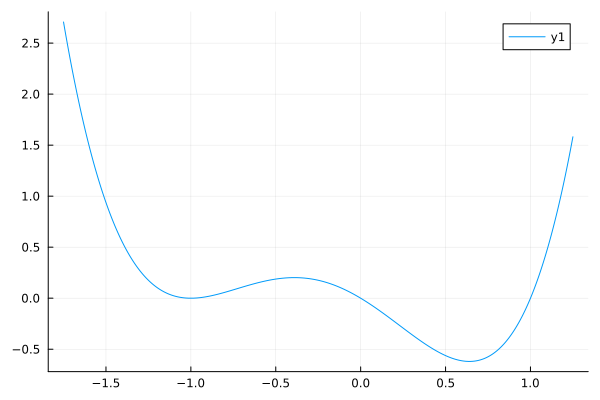

In [8]:
plot(x, f(x))

In [9]:
function newton_step(x)
    dx = - ∇²f(x) \ ∇f(x)
    return x + dx
end

newton_step (generic function with 1 method)

## Case 1. (x = 1.0)

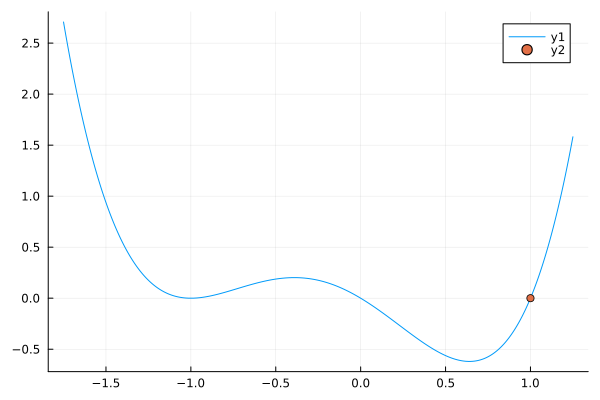

In [17]:
x_guess = [1.0]
plot(x, f(x))
scatter!(x_guess, f(x_guess))

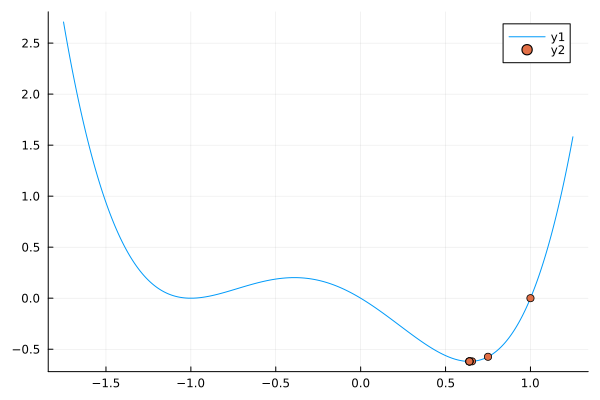

In [23]:
x_guess = [ x_guess..., newton_step(x_guess[end]) ]
plot(x, f(x))
scatter!(x_guess, f(x_guess))

## Case 2. (x = -1.3)

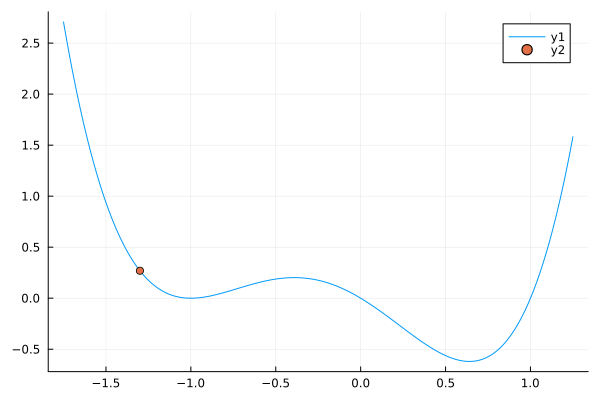

In [24]:
x_guess = [-1.3]
plot(x, f(x))
scatter!(x_guess, f(x_guess))

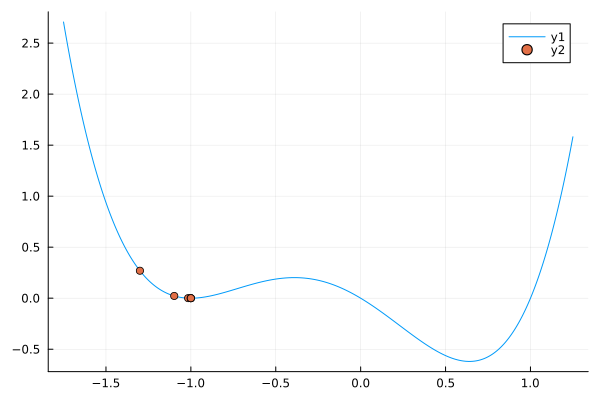

In [29]:
x_guess = [ x_guess..., newton_step(x_guess[end]) ]
plot(x, f(x))
scatter!(x_guess, f(x_guess))

## Case 3. (x = 0.0, Exception Case) 

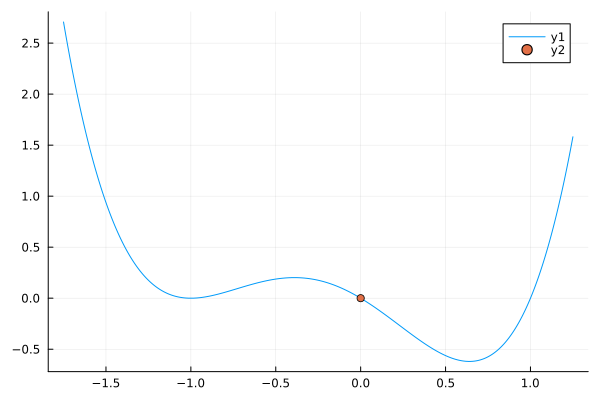

In [30]:
x_guess = [0.0]
plot(x, f(x))
scatter!(x_guess, f(x_guess))

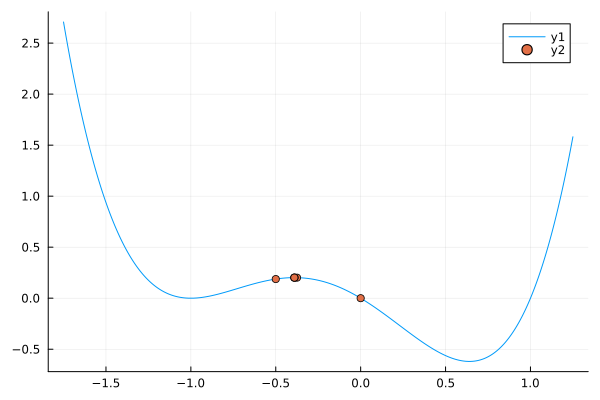

In [35]:
x_guess = [ x_guess..., newton_step(x_guess[end]) ]
plot(x, f(x))
scatter!(x_guess, f(x_guess))

## Check Hessians of three cases

In [36]:
@show ∇²f(1.0), ∇²f(-1.3), ∇²f(0.0)

(∇²f(1.0), ∇²f(-1.3), ∇²f(0.0)) = (16.0, 10.48, -2.0)


(16.0, 10.48, -2.0)

## Regularization

In [43]:
function regularized_newton_step(x, beta)

    H = ∇²f(x)

    while !isposdef(H)
        H = H + beta .* I
    end

    dx = - H \ ∇f(x)

    return x + dx
end

regularized_newton_step (generic function with 1 method)

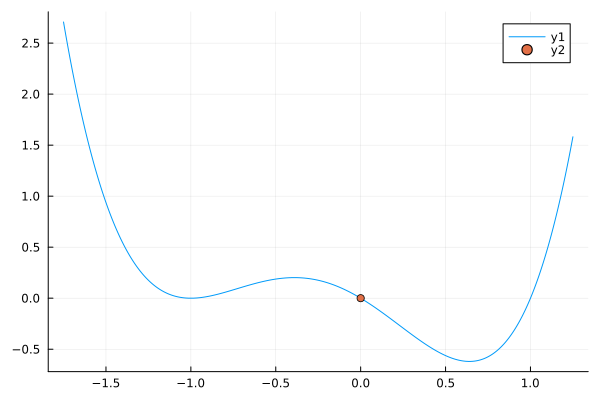

In [49]:
x_guess = [0.0]
plot(x, f(x))
scatter!(x_guess, f(x_guess))

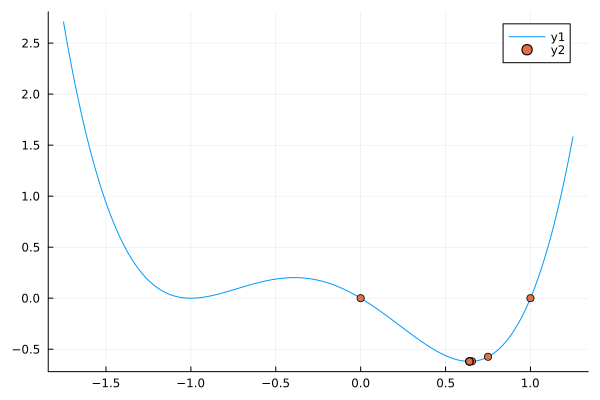

In [57]:
beta = 1.0
x_guess = [ x_guess..., regularized_newton_step(x_guess[end], beta) ]
plot(x, f(x))
scatter!(x_guess, f(x_guess))

In [67]:
function regularization_only(x, beta)

    H = ∇²f(x)

    while !isposdef(H)
        @show H
        H = H + beta .* I
    end

    return H
end

regularization_only (generic function with 1 method)

In [68]:
x_guess = 0.0
beta = 1.0

1.0

In [69]:
regularization_only(x_guess, beta)

H = -2.0
H = -1.0
H = 0.0


1.0